<a href="https://colab.research.google.com/github/poggiogu/DiploDatos2025_Mentoria_17/blob/master/mentoria_17_tp1_testeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook N1 Mentoría 17

M17 - Inventarios Forestales Nacionales, calculo de biomasa y evaluación del estado de los bosques nativos.

### TP1 >> Análisis y Visualizacion de los datasets
- Grupo 1
- Integrantes:
    - Guillermo Poggioni
    - Ana Luz Alabi Nassr
    - Nicolas Balmaceda

In [12]:
# ****************************************************************************************************************
# en caso de tener inconvenientes con las librerias "joypy" o "cartopy", instalarlas con las dos lineas siguientes
!pip install joypy
!pip install cartopy
!pip install altair vega_datasets gTTS
# ****************************************************************************************************************
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import joypy.joyplot as joyplot
import cartopy
import math

### Archivo 1 >> Tabla_general_2021

In [13]:
url = 'https://github.com/poggiogu/DiploDatos2025_Mentoria_17/raw/refs/heads/master/Data/2INBN_Tabla_general_2021.csv'
df_general = pd.read_csv(url, encoding='latin1')

In [14]:
# testeo del upload del dataframe al notebook con los 3 primeros registros:
df_general.head(3)

,UM_ID_UM,REGION_OFC,SUBREG,PROVINCIA,MEDIA_ALTURA_UM_EST,SUMA_DAP_X_UM,AREA_BASAL_UM_HA,VOL_M3_HA,CANTIDAD_IND_VIVOS_UM,CANTIDAD_IND_VIVOS_HA,...,FORMAS_CACTACEAS,FORMAS_EPIFITAS,FORMAS_BRIOFITAS,FORMAS_LIANAS,FORMAS_ORQUIDEAS,FORMAS_GRAMINEAS,FORMAS_OTRAS,Ley_N1_06,Ley_N2_06,PRESENTA_IND_INVENTARIABLE
0,6074195,MON,Monte,6.0,3.471429,0.914532,1.560872,1.728589,14.0,257.2,...,False,False,False,False,False,True,False,OTF,Bosque mixto,SI
1,6075190,ESP,Distrito del Caldén,6.0,5.450000,0.665793,2.928567,13.001816,2.0,49.3,...,False,False,False,False,False,True,False,TF,Bosques de caldén abierto con arbustos,SI
2,6076186,ESP,Distrito del Caldén,6.0,3.897143,4.097999,6.866252,44.521998,35.0,877.4,...,True,True,False,False,False,True,False,TF,Bosques de caldén abierto con arbustos,SI



**Variables incluidas en la tabla de datos adjunta:**

| Variable               | Descripción                                                                                         |
|------------------------|-----------------------------------------------------------------------------------------------------|
| **UM_ID_UM**           | Identificador único de cada unidad de muestreo                                                      |
| **REGION_OFC**         | Región forestal                                                                                     |
| **SUBREG**             | Subregión forestal                                                                                  |
| **PROVINCIA**          | Código del Instituto Nacional de Estadísticas y Censos (INDEC)                                      |
| **MEDIA_ALTURA_UM_EST**| Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m)               |
| **SUMA_DAP_X_UM**      | Sumatoria del diámetro a la altura del pecho de los individuos leñosos vivos en la unidad (m)       |
| **AREA_BASAL_UM_HA**   | Área basal por hectárea de los individuos leñosos vivos (m²/ha)                                      |
| **VOL_M3_HA**          | Volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha)                    |
| **CANTIDAD_IND_VIVOS_UM** | Número de individuos leñosos vivos en la unidad de muestreo                                      |
| **CANTIDAD_IND_VIVOS_HA** | Número estimado de individuos leñosos vivos por hectárea                                         |
| **PORCENTAJE_COB_3**   | Cobertura (%) de proyecciones aéreas de individuos arbóreos de 3 a 7 m de altura                     |
| **PORCENTAJE_COB_7**   | Cobertura (%) de proyecciones aéreas de individuos arbóreos > 7 m de altura                          |
| **PORCENTAJE_COB_TOTAL** | Cobertura total (%) (con superposición) de proyecciones aéreas de individuos arbóreos             |
| **PORCENTAJE_COB_ARBUSTIVA** | Cobertura (%) de proyecciones aéreas de individuos arbustivos                               |
| **PORCENTAJE_COB_INFERIOR**  | Cobertura (%) de proyecciones aéreas de gramíneas y herbáceas                            |
| **MEDIA_ALT_TOCONES**   | Altura media de tocones en la unidad de muestreo (cm)                                               |
| **MEDIA_DAB_TOCONES**   | Diámetro medio en la base de tocones en la unidad de muestreo (cm)                                  |
| **CANTIDAD_TOCONES_X_UM** | Número de tocones en la unidad de muestreo                                                     |
| **CANTIDAD_TOCONES_X_HA** | Número estimado de tocones por hectárea                                                          |
| **REGENERACION_UM**     | Número total de individuos de regeneración en subparcelas C de la unidad de muestreo                |
| **REGENERACION_HA**     | Número estimado de individuos de regeneración por hectárea                                         |
| **LONGITUD_GRILLA**     | Longitud de la cuadrícula para ubicación de la unidad de muestreo (°)                               |
| **LATITUD_GRILLA**      | Latitud de la cuadrícula para ubicación de la unidad de muestreo (°)                                |
| **LONGITUD_INSTALACION**| Longitud del centro de la unidad de muestreo (°)                                                    |
| **LATITUD_INSTALACION** | Latitud del centro de la unidad de muestreo (°)                                                     |
| **ALTITUD**             | Altitud media sobre el nivel del mar de la parcela (m s.n.m.)                                       |
| **PENDIENTE**           | Categoría de pendiente (sin_pendiente, suave, moderada, fuerte)                                     |
| **EXPOSICION**          | Orientación de la pendiente (N, NE, E, SE, S, SW, O, NO)                                            |
| **OTBN_CATEGORIA**      | Categoría según Ordenamiento Territorial de Bosques Nativos (I, II, III, sin_categoria)             |
| **FECHA_UM_ANIO**       | Año de colecta de datos en la unidad de muestreo                                                    |
| **FECHA_UM_MES**        | Mes de colecta de datos en la unidad de muestreo                                                    |
| **TIPO_PAISAJE**        | Tipo de paisaje predominante en la unidad de muestreo                                               |
| **SALINIDAD_PRESENCIA** | Evidencia de salinidad (TRUE/FALSE)                                                                 |
| **INCENDIOS_RASTROS**   | Rastros de incendios (TRUE/FALSE)                                                                   |
| **PASTOREO_PRESENCIA**  | Evidencia de pastoreo (TRUE/FALSE)                                                                  |
| **GANADO_BOVINO**       | Presencia de ganado bovino (TRUE/FALSE)                                                             |
| **GANADO_OVINO**        | Presencia de ganado ovino (TRUE/FALSE)                                                              |
| **GANADO_CAPRINO**      | Presencia de ganado caprino (TRUE/FALSE)                                                            |
| **GANADO_EQUINO**       | Presencia de ganado equino (TRUE/FALSE)                                                             |
| **GANADO_OTRO**         | Presencia de otro tipo de ganado (TRUE/FALSE)                                                       |
| **GANADO_OTRO_TIPO**    | Texto libre especificando otro tipo de ganado                                                       |
| **EROSION_PRESENCIA**   | Erosión presente (TRUE/FALSE)                                                                       |
| **EROSION_FISICA_PRESENCIA** | Erosión física (TRUE/FALSE)                                                                    |
| **EROSION_EOLICA_PRESENCIA** | Erosión eólica (TRUE/FALSE)                                                                   |
| **EROSION_HIDRICA_PRESENCIA** | Erosión hídrica (TRUE/FALSE)                                                                 |
| **PFNM_PRESENCIA_RESUMEN** | Resumen de especies no arbóreas de interés (texto)                                               |
| **PFNM_REGISTRO_1**     | Especie no arbórea 1 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_2**     | Especie no arbórea 2 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_3**     | Especie no arbórea 3 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_4**     | Especie no arbórea 4 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_5**     | Especie no arbórea 5 de 5 (nombre científico o “sin registro”)                                       |
| **FORMAS_HELECHOS**     | Presencia de helechos (TRUE/FALSE)                                                                  |
| **FORMAS_CACTACEAS**    | Presencia de cactáceas (TRUE/FALSE)                                                                 |
| **FORMAS_EPIFITAS**     | Presencia de epífitas (TRUE/FALSE)                                                                  |
| **FORMAS_BRIOFITAS**    | Presencia de briófitas (TRUE/FALSE)                                                                 |
| **FORMAS_LIANAS**       | Presencia de lianas (TRUE/FALSE)                                                                    |
| **FORMAS_ORQUIDEAS**    | Presencia de orquídeas (TRUE/FALSE)                                                                 |
| **FORMAS_GRAMINEAS**    | Presencia de gramíneas (TRUE/FALSE)                                                                 |
| **FORMAS_OTRAS**        | Presencia de otras formas de vida (TRUE/FALSE)                                                      |
| **Ley_N1_06**           | Leyenda Nivel 1 de Bosques Nativos (TF/OTF)                                                          |
| **Ley_N2_06**           | Leyenda Nivel 2 de Bosques Nativos (tipos forestales)                                                |
| **PRESENTA_IND_INVENTARIABLE** | Presencia (“SI”/“NO”) de individuos leñosos inventariables                                 |

In [15]:
columnas_num = df_general.select_dtypes(include=['number']).columns.tolist()
columnas_cat = df_general.select_dtypes(exclude=['number']).columns.tolist()

print("Columnas numéricas:", columnas_num)
print("Columnas categóricas:", columnas_cat)

Columnas numéricas: ['UM_ID_UM', 'PROVINCIA', 'MEDIA_ALTURA_UM_EST', 'SUMA_DAP_X_UM', 'AREA_BASAL_UM_HA', 'VOL_M3_HA', 'CANTIDAD_IND_VIVOS_UM', 'CANTIDAD_IND_VIVOS_HA', 'PORCENTAJE_COB_3', 'PORCENTAJE_COB_7', 'PORCENTAJE_COB_TOTAL', 'PORCENTAJE_COB_ARBUSTIVA', 'PORCENTAJE_COB_INFERIOR', 'MEDIA_ALT_TOCONES', 'MEDIA_DAB_TOCONES', 'CANTIDAD_TOCONES_X_UM', 'CANTIDAD_TOCONES_X_HA', 'REGENERACION_UM', 'REGENERACION_HA', 'LONGITUD_GRILLA', 'LATITUD_GRILLA', 'LONGITUD_INSTALACION', 'LATITUD_INSTALACION', 'ALTITUD', 'FECHA_UM_ANIO', 'FECHA_UM_MES']
Columnas categóricas: ['REGION_OFC', 'SUBREG', 'PENDIENTE_CATEGORIA', 'EXPOSICION', 'OTBN_CATEGORIA', 'TIPO_PAISAJE', 'SALINIDAD_PRESENCIA', 'INCENDIOS_RASTROS', 'PASTOREO_PRESENCIA', 'GANADO_BOVINO', 'GANADO_OVINO', 'GANADO_CAPRINO', 'GANADO_EQUINO', 'GANADO_OTRO', 'GANADO_OTRO_TIPO', 'EROSION_PRESENCIA', 'EROSION_FISICA_PRESENCIA', 'EROSION_EOLICA_PRESENCIA', 'EROSION_HIDRICA_PRESENCIA', 'PFNM_PRESENCIA_RESUMEN', 'PFNM_REGISTRO_1', 'PFNM_REGISTRO_2

#### Se ven que hay variables que contienen valores numéricos pero son de naturaleza categórica
estos son: **FECHA_UM_MES**, **FECHA_UM_ANIO**, **PROVINCIA**

In [16]:
columnas_codificadas = ['FECHA_UM_MES','FECHA_UM_ANIO','PROVINCIA']
columnas_num = [col for col in columnas_num if col not in columnas_codificadas]

print('Columnas CATEGÓRICAS:', columnas_cat)
print('Columnas NUMÉRICAS:', columnas_num)
print('Columnas CODIFICADAS:', columnas_codificadas)

Columnas CATEGÓRICAS: ['REGION_OFC', 'SUBREG', 'PENDIENTE_CATEGORIA', 'EXPOSICION', 'OTBN_CATEGORIA', 'TIPO_PAISAJE', 'SALINIDAD_PRESENCIA', 'INCENDIOS_RASTROS', 'PASTOREO_PRESENCIA', 'GANADO_BOVINO', 'GANADO_OVINO', 'GANADO_CAPRINO', 'GANADO_EQUINO', 'GANADO_OTRO', 'GANADO_OTRO_TIPO', 'EROSION_PRESENCIA', 'EROSION_FISICA_PRESENCIA', 'EROSION_EOLICA_PRESENCIA', 'EROSION_HIDRICA_PRESENCIA', 'PFNM_PRESENCIA_RESUMEN', 'PFNM_REGISTRO_1', 'PFNM_REGISTRO_2', 'PFNM_REGISTRO_3', 'PFNM_REGISTRO_4', 'PFNM_REGISTRO_5', 'FORMAS_HELECHOS', 'FORMAS_CACTACEAS', 'FORMAS_EPIFITAS', 'FORMAS_BRIOFITAS', 'FORMAS_LIANAS', 'FORMAS_ORQUIDEAS', 'FORMAS_GRAMINEAS', 'FORMAS_OTRAS', 'Ley_N1_06', 'Ley_N2_06', 'PRESENTA_IND_INVENTARIABLE']
Columnas NUMÉRICAS: ['UM_ID_UM', 'MEDIA_ALTURA_UM_EST', 'SUMA_DAP_X_UM', 'AREA_BASAL_UM_HA', 'VOL_M3_HA', 'CANTIDAD_IND_VIVOS_UM', 'CANTIDAD_IND_VIVOS_HA', 'PORCENTAJE_COB_3', 'PORCENTAJE_COB_7', 'PORCENTAJE_COB_TOTAL', 'PORCENTAJE_COB_ARBUSTIVA', 'PORCENTAJE_COB_INFERIOR', 'MED

##### Mapeo de los nombres de las provincias y las regiones para que queden mas claras al momento de analizar en los plots posteriores:

In [17]:
# creación de un DF copia para poder alterar y realizar comparaciones en bloques de código posteriores:
df_general_c = df_general.copy()

# mapeo de provincias con códigos del INDEC (id de la clumna 'PROVINCIA')
provincia_dict = {
    2:  "CABA", 6:  "Buenos Aires", 10: "Catamarca", 14: "Córdoba", 18: "Corrientes", 22: "Chaco", 26: "Chubut", 30: "Entre Ríos",
    34: "Formosa", 38: "Jujuy", 42: "La Pampa", 46: "La Rioja", 50: "Mendoza", 54: "Misiones", 58: "Neuquén", 62: "Río Negro",
    66: "Salta", 70: "San Juan", 74: "San Luis", 78: "Santa Cruz", 82: "Santa Fe", 86: "Santiago del Estero", 90: "Tucumán",
    94: "Tierra del Fuego, Antártida e Islas del Atlántico Sur"
}
# agregao una columna para el nombre de las provincias
df_general_c['PROVINCIA_NOMBRE'] = df_general_c['PROVINCIA'].map(provincia_dict)

# mapeo de regiones
reg_dict = {
    'MON': "Monte", 'ESP': "Espinal", 'PCH': "Parque Chaqueño", 'STB': "Selva Tucumano-Boliviana", 'SMI': "Selva Misionera", 'BAP': "Bosque Andino Patagónico" , 'DEL': "Delta del rio Paraná"
}
# agregao una columna para el nombre de las regiones uso el mapeo anterior
df_general_c['REGION_NOMBRE'] = df_general_c['REGION_OFC'].map(reg_dict)

#### Histogramas de todas las variable numéricas:

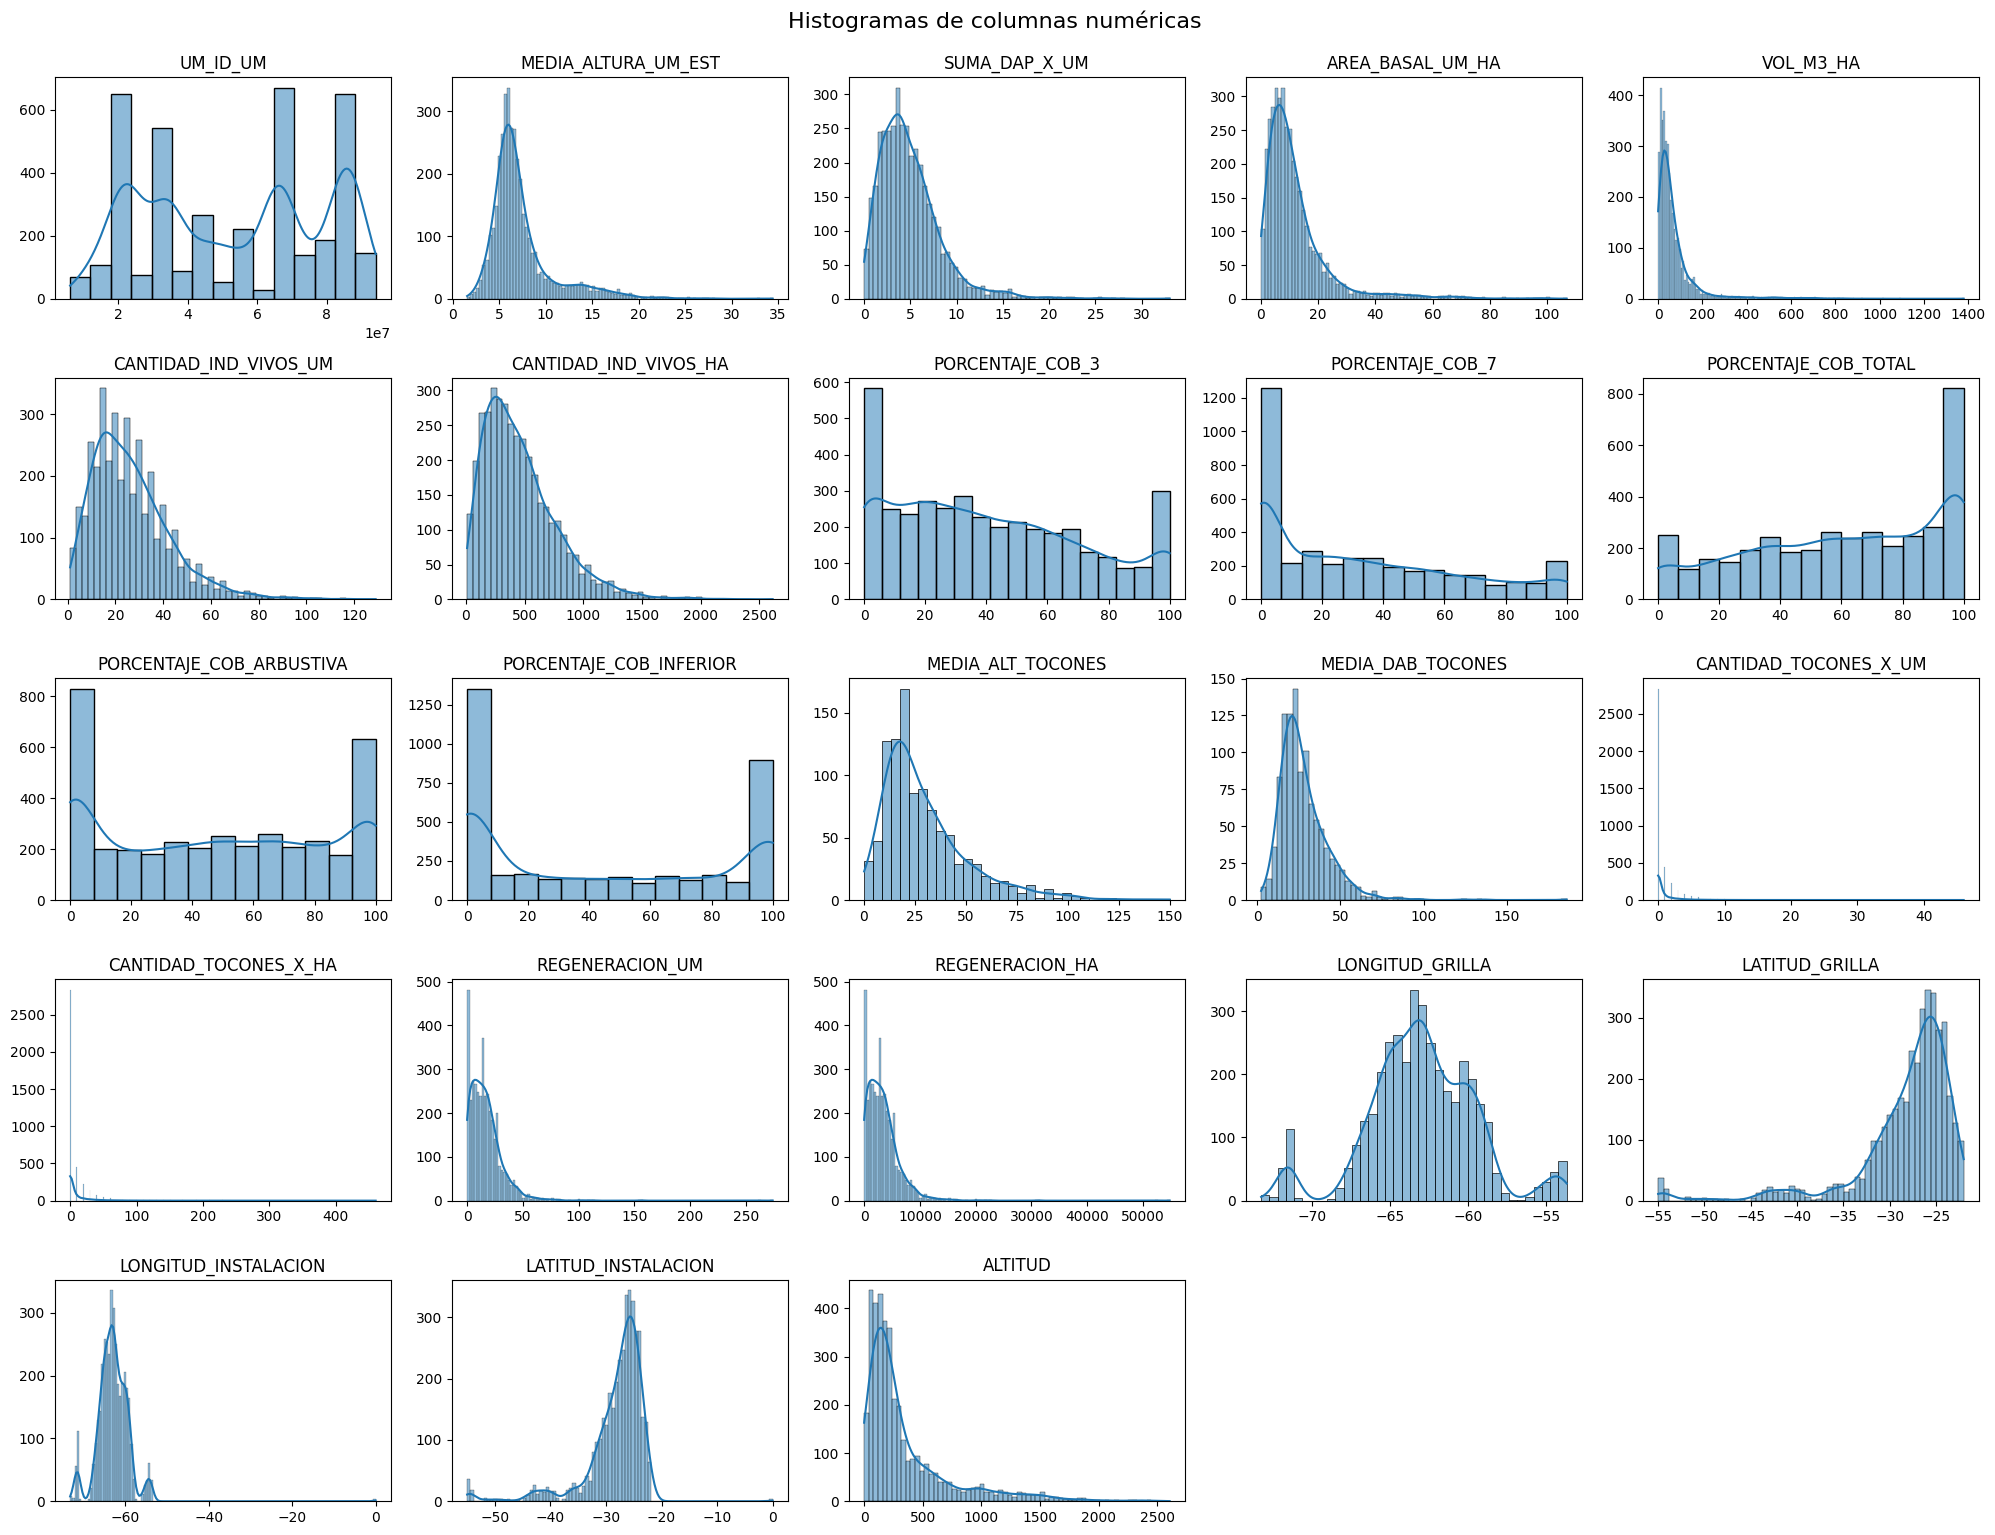

In [18]:
# Número de columnas a graficar
n = len(columnas_num)

# Determinar cantidad de filas y columnas
n_cols = 5
n_rows = math.ceil(n / n_cols)

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada histograma
for i, col in enumerate(columnas_num):
    sns.histplot(df_general[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
# Borrar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle("Histogramas de columnas numéricas", fontsize=16, y=1.02)
plt.show()

#### Distribuciones de altura media por unidad muestral por Región Forestal:

C:\Users\PC\AppData\Local\Temp\ipykernel_21028\229900198.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

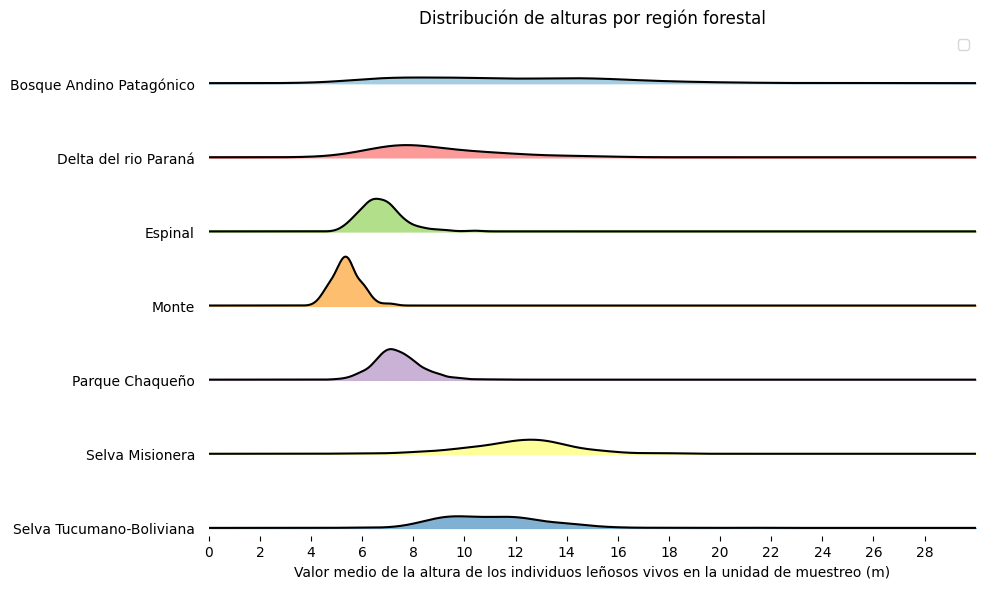

In [19]:
colores = ['#a6cee3', '#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6', '#ffff99','#80b1d3']

plt.figure(figsize=(10, 6))
joyplot(
    data=df_general_c,
    by='REGION_NOMBRE',
    column='MEDIA_ALTURA_UM_EST',
    figsize=(10, 6),
    kind='kde',         # usa densidad, no histograma
    overlap=1,          # superposición entre curvas (ajustable)
    color=colores
)
plt.title("Distribución de alturas por región forestal")
plt.xlabel("Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m)")
plt.ylabel("Región forestal")
plt.xlim(0, 30)  # Ajustar el rango del eje x
xticks = np.arange(0, 30, 2)
plt.xticks(xticks)
plt.legend()
plt.tight_layout()
plt.show()


#### Distribuciones del volumen comercial de madera por region forestal:

C:\Users\PC\AppData\Local\Temp\ipykernel_21028\1412532452.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 2000x2000 with 0 Axes>

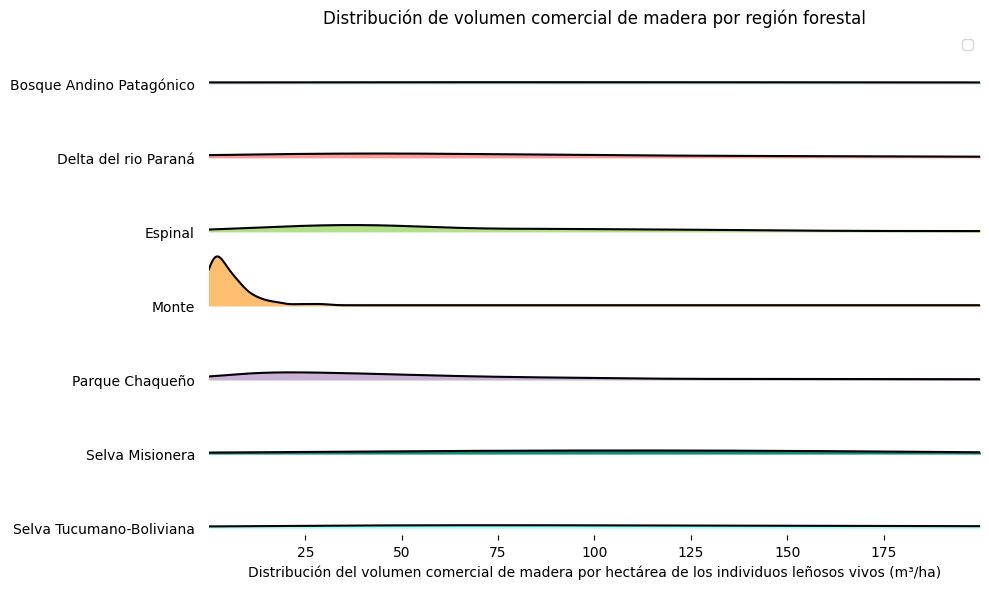

In [20]:
colores = ['#a6cee3', '#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6', "#128b7d","#99fff8"]

plt.figure(figsize=(20, 20))
joyplot(
    data=df_general_c,
    by='REGION_NOMBRE',
    column='VOL_M3_HA',
    figsize=(10, 6),
    kind='kde',         # usa densidad, no histograma
    overlap=1,          # superposición entre curvas (ajustable)
    color=colores,
    x_range=(0,200)
)
plt.title("Distribución de volumen comercial de madera por región forestal")
plt.xlabel("Distribución del volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha)")
plt.ylabel("Región forestal")
plt.legend()
plt.tight_layout()
plt.show()

Los gráficos tipo *joyplot* presentados anteriormente buscan reproducir el análisis contenido en el informe oficial del Inventario Nacional de Bosques Nativos [INBN2](https://www.argentina.gob.ar/sites/default/files/2019/07/inbn2_infografia_del_informe_nacional.pdf).

En el primer gráfico se muestra la distribución de la altura media de los individuos leñosos por unidad de muestreo. Se observa una distribución bien definida para la región del Monte, con una altura media nacional cercana a los 5 metros. La región con los individuos de mayor altura corresponde a la Selva Misionera.

En cuanto al segundo gráfico que muestra el volumen comercial de madera por hectárea en las distintas regiones, el análisis resulta menos concluyente debido a la fuerte dispersión de las dsitribuciones de datos.

Dado que estos gráficos no permiten extraer conclusiones precisas para algunas variables, se recurre a visualizaciones adicionales más adecuadas para un análisis cuantitativo más riguroso.


### Distribución geográfica de las Regiones Forestles:

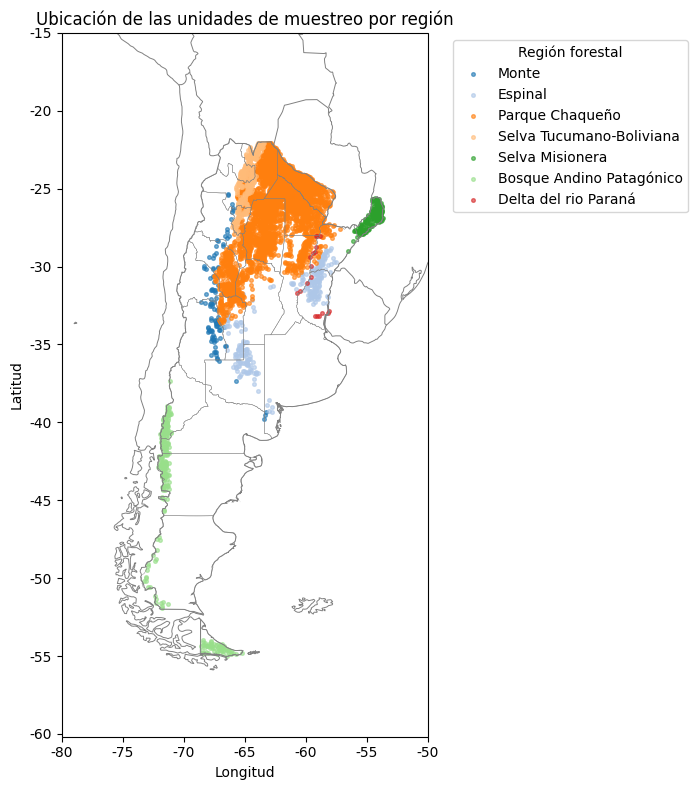

In [21]:
# Paleta de colores para las regiones (modificá según cantidad de regiones)
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

provincias = gpd.read_file('https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_1.json') # para agregar departamentos:gadm41_ARG_2
# Por un problema de incompatibilidad de Github y los archivos de formato ".shp" se puede optar por
# obtener la version .json directamente del sitio "https://geodata.ucdavis.edu/gadm/gadm4.1/json/":
# 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_0.json' >> Límites nacionales
# 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_1.json' >> Límites provinciales
# 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_2.json' >> Límites departamentales


# Obtener regiones únicas y asignar colores
regiones = df_general_c['REGION_NOMBRE'].dropna().unique()
nombres_regiones = df_general_c['REGION_NOMBRE'].dropna().unique()

colores = plt.cm.tab20.colors  # Paleta con hasta 20 colores

# Crear diccionario región -> color
color_map = {region: colores[i % len(colores)] for i, region in enumerate(regiones)}

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Limites provinciales argentinos
provincias.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.3)

# Límites internacionales y costeros
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='grey', linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey', linewidth=0.7)

# Graficar puntos coloreados según REGION_OFC
for region in regiones:
    df_region = df_general_c[df_general_c['REGION_NOMBRE'] == region]
    ax.scatter(
        df_region['LONGITUD_INSTALACION'],
        df_region['LATITUD_INSTALACION'],
        color=color_map[region],
        s=7,
        alpha=0.6,
        label=region
    )

ax.set_extent([-75, -50, -60, -20])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Ejes con ticks personalizados
xticks = np.arange(-80, -49, 5)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks])

yticks = np.arange(-60, -14, 5)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_yticklabels([str(y) for y in yticks])

ax.set_title('Ubicación de las unidades de muestreo por región')
ax.legend(title='Región forestal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Distribucion nacional de la variable "OTBN_CATEGORIA": Categoría según Ordenamiento Territorial de Bosques Nativos (I, II, III, sin_categoria)
- Categoría I (rojo):
    Sectores de muy alto valor de conservación que no deben transformarse.
- Categoría II (amarillo):
    Sectores de mediano valor de conservación, con potencial para restauración y manejo sostenible.
- Categoría III (verde):
    Sectores de bajo valor de conservación, con posibilidad de transformación parcial o total, dentro de los límites establecidos por la ley.
- Sin categoría (gris):
    Áreas donde la cobertura boscosa considerada para el ordenamiento difiere de la utilizada para el monitoreo nacional.

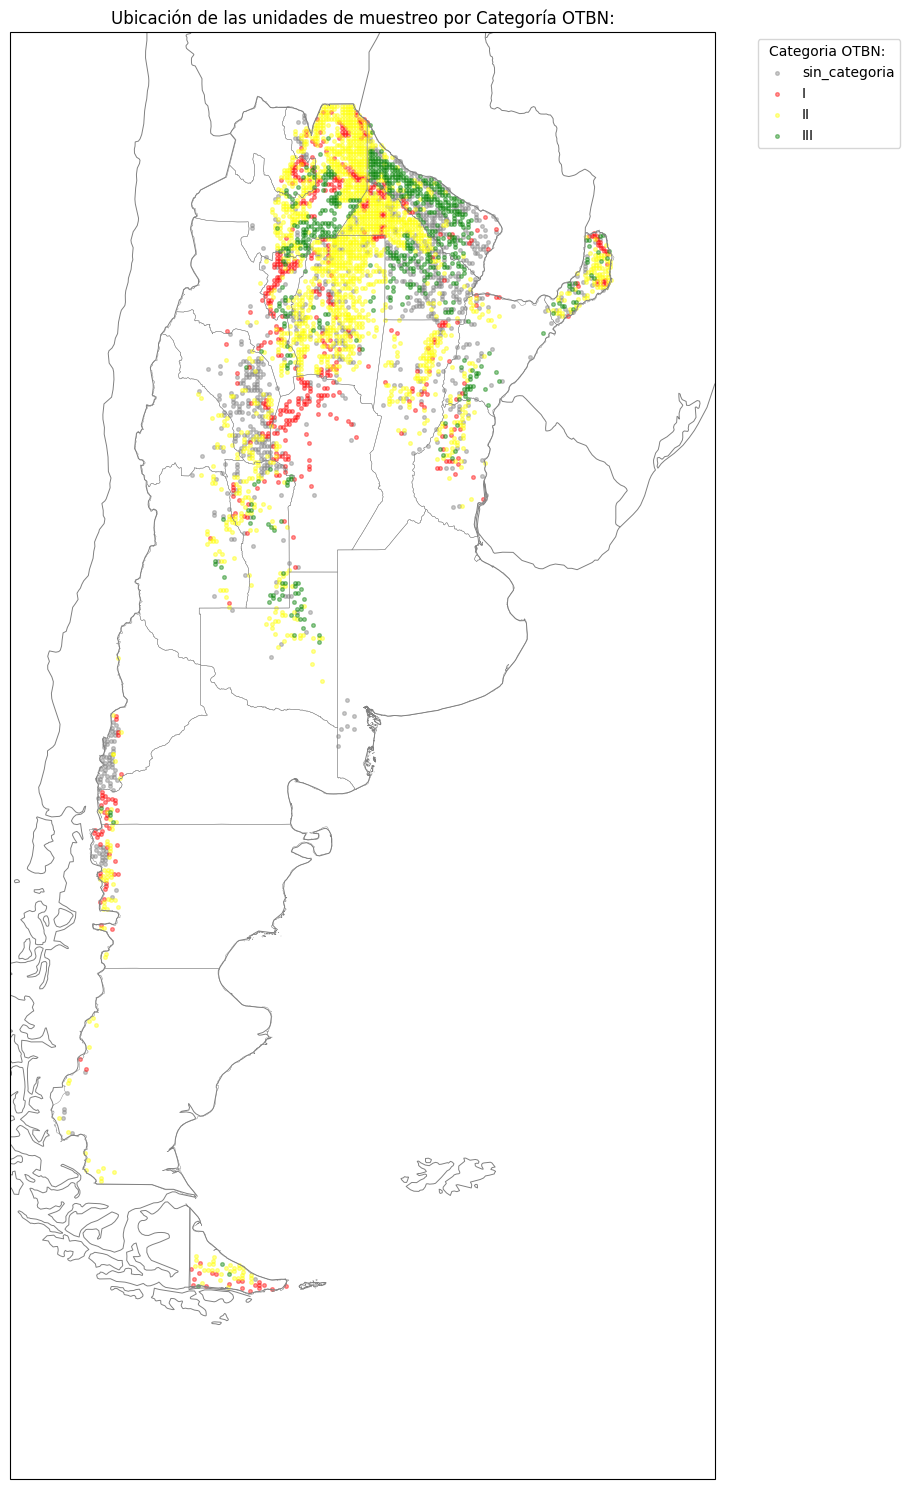

In [22]:
# Obtener OTBNS únicas y asignar colores
otbns = ['sin_categoria', 'I', 'II', 'III']

# Crear diccionario región -> color
color_map = {'sin_categoria': 'grey', 'I': 'red', 'II': 'yellow', 'III': 'green'}

fig = plt.figure(figsize=(14, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Limites provinciales argentinos
provincias.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.3)
# Límites internacionales y costeros
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='grey', linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey', linewidth=0.7)

# Graficar puntos coloreados según OTBN_CATEGORIA
for otbn in otbns:
    df_otbn = df_general[df_general['OTBN_CATEGORIA'] == otbn]
    ax.scatter(
        df_otbn['LONGITUD_INSTALACION'],
        df_otbn['LATITUD_INSTALACION'],
        color=color_map[otbn],
        s=7,
        alpha=0.4,
        label=otbn
    )

ax.set_extent([-75, -50, -60, -20])
ax.set_title('Ubicación de las unidades de muestreo por Categoría OTBN:')
ax.legend(title='Categoria OTBN: ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Relación de las UM de categoría OTBN I con la presencia de ganado bobino, evidencia de pastoreo y rastros de incendios:

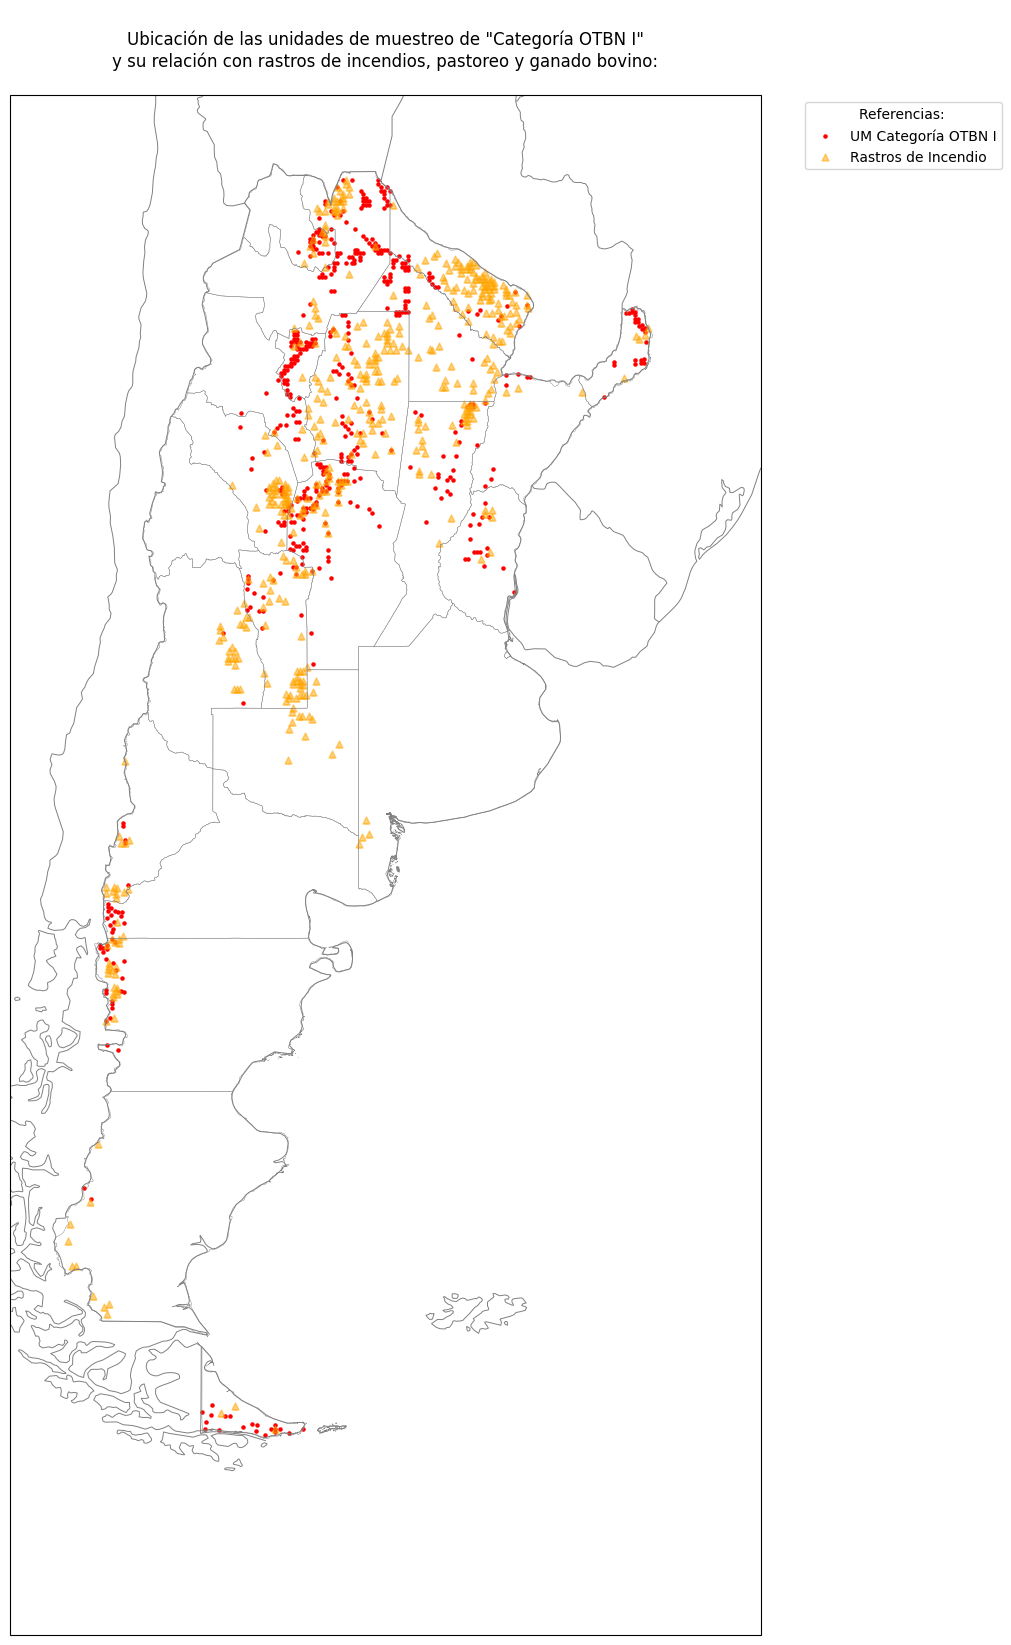

In [23]:
fig = plt.figure(figsize=(14, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Limites provinciales argentinos
provincias.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.3)
# Límites internacionales y costeros
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='grey', linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey', linewidth=0.7)

# Graficar puntos coloreados según OTBN_CATEGORIA
df_otbn = df_general[df_general['OTBN_CATEGORIA'] == 'I']
ax.scatter(
    df_otbn['LONGITUD_INSTALACION'],
    df_otbn['LATITUD_INSTALACION'],
    color='red',
    s=5,
    alpha=1,
    label= 'UM Categoría OTBN I'
)

# Incendios
df_incendios = df_general[df_general['INCENDIOS_RASTROS'] == True]
ax.scatter(
    df_incendios['LONGITUD_INSTALACION'],
    df_incendios['LATITUD_INSTALACION'],
    marker='^',
    color='orange',
    s=25,
    alpha=0.5,
    label='Rastros de Incendio'
)

# # Pastoreo
# df_pastoreo = df_general[df_general['PASTOREO_PRESENCIA'] == True]
# ax.scatter(
#     df_pastoreo['LONGITUD_INSTALACION'],
#     df_pastoreo['LATITUD_INSTALACION'],
#     marker='s',
#     color='green',
#     s=20,
#     alpha=0.05,
#     label='Evidencia de Pastoreo'
# )

# # Ganado bobino
# df_ganado = df_general[df_general['GANADO_BOVINO'] == True]
# ax.scatter(
#     df_ganado['LONGITUD_INSTALACION'],
#     df_ganado['LATITUD_INSTALACION'],
#     marker='x',
#     color='blue',
#     s=7,
#     alpha=0.2,
#     label='Presencia de ganado bobino'
# )

ax.set_extent([-75, -50, -60, -20])
ax.set_title("""
Ubicación de las unidades de muestreo de "Categoría OTBN I"
y su relación con rastros de incendios, pastoreo y ganado bovino:
""")
ax.legend(title='Referencias: ',bbox_to_anchor=(1.05, 1), loc='upper left')

- Se observa que **la gran mayoría de las Unidades de Muestreo de la provincia de Córdoba** pertenece casi en su totalidad a la **Categoría OTBN I** *(sectores de muy alto valor de conservación que no deben transformarse)*, y as la vez también notamos que la mayor parte los registros de estas UM presentan rastros de incendios.  
- **La mayor concentración de Unidades de Muestreo en la Categoría OTBN II** *(sectores de valor de conservación medio, con potencial para restauración y manejo sostenible)* se distribuye principalmente en la provincia de Córdoba y áreas adyacentes.  
- **Las Unidades de Muestreo clasificadas en la Categoría OTBN III** *(sectores de bajo valor de conservación, con posibilidad de transformación parcial o total)* se concentran sobre todo en la provincia de Formosa, el este del Chaco y el sureste de Salta.  
- Todas las unidades mencionadas se encuentran dentro de la **región forestal “Parque Chaqueño”**, la más extensa de las analizadas en este dataset.  
- **Las Unidades de Muestreo sin categoría OTBN** muestran una alta concentración en el sudeste de Neuquén (región Bosque Andino-Patagónico), el oeste de Catamarca y las provincias de Chaco y Formosa (región Parque Chaqueño).

### **Análisis de las variables:**
- **CANTIDAD_IND_VIVOS_HA:**	Número estimado de individuos leñosos vivos por hectárea
- **AREA_BASAL_UM_HA:**	Área basal por hectárea de los individuos leñosos vivos (m²/ha)
- **VOL_M3_HA:**	Volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha)

####  **También agregamos las siguientes variables para su análisis en detalle:**
- **PORCENTAJE_COB_TOTAL** Cobertura total (%) (con superposición) de proyecciones aéreas de individuos arbóreos
- **MEDIA_ALTURA_UM_EST:** Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m)

#### ***Más adelante encontrará histogramas interactivos en el que se puede seleccionar la variable a analizar y una lista de filtros categóricos para analizar su comportamiento***

##### categorizacion de la variable ALTITUD

In [24]:
# categorizar ALTITUD
def clasificar_alt(alt):
    if pd.isna(alt): return 'Sin dato'
    elif alt <= 25: return '0 - 25 msnm'
    elif alt <= 100: return '26 - 100 msnm'
    elif alt <= 500: return '101 - 500 msnm'
    elif alt <= 1000: return '501 - 1000 msnm'
    elif alt <= 2000: return '1001 - 2000 msnm'
    else: return '> 2000 msnm'

# columna 'ALTITUD' categorizada por segmentos
df_general_c['ALTITUD_CATEGORIZADA'] = df_general_c['ALTITUD'].apply(clasificar_alt)

##### Instanciacion de las variables usadas para los dropdowns

In [25]:
# Valores únicos para los dropdowns
variablesDeAnalisis = ['CANTIDAD_IND_VIVOS_HA', 'VOL_M3_HA', 'AREA_BASAL_UM_HA', 'PORCENTAJE_COB_TOTAL', 'MEDIA_ALTURA_UM_EST']
incendios = ['Todos'] + sorted(df_general_c['INCENDIOS_RASTROS'].dropna().unique().tolist())
pendiente = ['Todos'] + sorted(df_general_c['PENDIENTE_CATEGORIA'].dropna().unique().tolist())
tipo_paisaje = ['Todos'] + sorted(df_general_c['TIPO_PAISAJE'].dropna().unique().tolist())
region_forestal = ['Todos'] + sorted(df_general_c['REGION_NOMBRE'].dropna().unique().tolist())
subreg = ['Todos'] + sorted(df_general_c['SUBREG'].dropna().unique().tolist())
altitud = ['Todos'] + ['0 - 25 msnm', '26 - 100 msnm', '101 - 500 msnm','501 - 1000 msnm', '1001 - 2000 msnm', '> 2000 msnm']
provincias = ['Todos'] + sorted(df_general_c['PROVINCIA_NOMBRE'].dropna().unique().tolist())
exposicion = ['Todos'] + sorted(df_general_c['EXPOSICION'].dropna().unique().tolist())

##### Funcion para generar los plots y sus filtros

In [ ]:
def comparar_distribuciones(var, provincias, region_forestal, subreg, tipo_paisaje, altitud, pendiente,  exposicion, incendios ):
    dataf = df_general_c
    if incendios != 'Todos':
        dataf = dataf[dataf['INCENDIOS_RASTROS'] == incendios]
    if subreg != 'Todos':
        dataf = dataf[dataf['SUBREG'] == subreg]
    if pendiente != 'Todos':
        dataf = dataf[dataf['PENDIENTE_CATEGORIA'] == pendiente]
    if tipo_paisaje != 'Todos':
        dataf = dataf[dataf['TIPO_PAISAJE'] == tipo_paisaje]
    if region_forestal  != 'Todos':
        dataf = dataf[dataf['REGION_NOMBRE'] == region_forestal]
    if altitud  != 'Todos':
        dataf = dataf[dataf['ALTITUD_CATEGORIZADA'] == altitud]
    if provincias  != 'Todos':
        dataf = dataf[dataf['PROVINCIA_NOMBRE'] == provincias]
    if exposicion != 'Todos' :
        dataf = dataf[dataf['EXPOSICION'] == exposicion]
    # Control de error cuando no hay datos para alguna combinacion de filtros por ejemplo "Región Forestal": "Selva Misionera" en la "Provincia": "Santa Cruz".
    if dataf.empty:
      print("""
      ****************************************************************************
      💀 No hay datos disponibles para la combinación de filtros seleccionados 💀
      ****************************************************************************
      """)
      return

    fig, axes = plt.subplots(nrows=2, figsize=(12, 9))
    # Primer subplot "filtrado"
    sns.histplot(dataf[var], bins=100, ax=axes[0], kde=True, color='seagreen')
    media_general = dataf[var].mean()
    mediana_general = dataf[var].median()
    std_general = dataf[var].std()
    #agrego la banda de desviación estándar al gráfico filtrado
    axes[0].axvspan(media_general - std_general, media_general + std_general, color='seagreen', alpha=0.2, label=f'±1 std = {std_general:.0f}')
    axes[0].axvline(media_general, color='orangered', linestyle='--', label=f'Media {media_general: .0f}')
    axes[0].axvline(mediana_general, color='indigo', linestyle='-.', label=f'Mediana {mediana_general: .0f}')
    axes[0].legend()
    axes[0].set_title(f"""
    Distribución filtrada de {var} según las siguientes categorías:
    Provincia: {provincias} | Region: {region_forestal} | Subregión: {subreg} | Tipo de paisaje: {tipo_paisaje} | Pendiente: {pendiente} | Altitud: {altitud} | Incendios: {incendios}
    =============================================
    Cantidad de registros filtrados: {len(dataf)}
    """)
    # Segundo subplot general "estático"
    base_df = df_general
    sns.histplot(base_df[var], bins=100, ax=axes[1], kde=True, color='gray')
    media_total = base_df[var].mean()
    mediana_total = base_df[var].median()
    std_total = base_df[var].std()
    # Agrego la banda de desviación estándar al gráfico general
    axes[1].axvspan(media_total - std_total, media_total + std_total, color='gray', alpha=0.2, label=f'±1 std = {std_total:.0f}')
    axes[1].axvline(media_total, color='red', linestyle='--', label=f'Media {media_total: .0f}')
    axes[1].axvline(mediana_total, color='black', linestyle='-.', label=f'Mediana {mediana_total: .0f}')
    axes[1].legend()
    axes[1].set_title(f"""
    Distribución general estatico de {var} como referencia muestral:
    (este gráfico queda estático y sirve solo como referencia para comparar con el gráfico filtrado)
    =============================================
    Cantidad de registros totales: {len(base_df)}
    """)

    fig.suptitle(f'Análisis de {var}', fontsize=14)
    plt.tight_layout(rect=[0., 0.03, 1., 0.95], h_pad=3) # Uso h_pad para modificar distancia vertical entre plots
    plt.show()


##### Este bloque renderiza los histogramas llamando lafuncion anterior:

In [ ]:
print("""
=============================================================================================================================
Modifique la opción en "Var de Análisis" para elegir entre:
      -Número estimado de individuos leñosos vivos por hectárea -> CANTIDAD_IND_VIVOS_HA
      -Área basal por hectárea de los individuos leñosos vivos (m²/ha) -> AREA_BASAL_UM_HA
      -Volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha) -> VOL_M3_HA
      -Cobertura total (%) (con superposición) de proyecciones aéreas de individuos arbóreos -> PORCENTAJE_COB_TOTAL
      -Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m) -> MEDIA_ALTURA_UM_EST

Utilice el resto de las listas desplegables para filtrar la variable de análisis seleccionada según Presencia de incendios,
Pendiente, Exposición, Tipo de paisaje, Región forestal, Subregion, Altitud, Provincia.
** Todos los filtros se pueden combinar, si no hay datos para la combinacion seleccionada se mostrará un mensaje.**
=============================================================================================================================
""")
# llamamos la instancia de widgets para generar e interactuar con los plots y filtros creados con la funcion comparar_distribuciones
widgets.interact(
    comparar_distribuciones,
    var=widgets.Dropdown(options=variablesDeAnalisis, description="Var Análisis: "),
    provincias=widgets.Dropdown(options=provincias, description='Provincia:'),
    region_forestal=widgets.Dropdown(options=region_forestal, description='Region :'),
    subreg=widgets.Dropdown(options=subreg, description='Subregión :'),
    tipo_paisaje=widgets.Dropdown(options=tipo_paisaje, description='Paisaje :'),
    pendiente=widgets.Dropdown(options=pendiente, description='Pendiente :'),
    altitud=widgets.Dropdown(options=altitud, description='Altitud :'),
    exposicion=widgets.Dropdown(options=exposicion, description='Exposisción :'),
    incendios=widgets.Dropdown(options=incendios, description='Incendios :'),
)


Modifique la opción en "Var de Análisis" para elegir entre:
      -Número estimado de individuos leñosos vivos por hectárea -> CANTIDAD_IND_VIVOS_HA
      -Área basal por hectárea de los individuos leñosos vivos (m²/ha) -> AREA_BASAL_UM_HA
      -Volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha) -> VOL_M3_HA
      -Cobertura total (%) (con superposición) de proyecciones aéreas de individuos arbóreos -> PORCENTAJE_COB_TOTAL
      -Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m) -> MEDIA_ALTURA_UM_EST

Utilice el resto de las listas desplegables para filtrar la variable de análisis seleccionada según Presencia de incendios,
Pendiente, Exposición, Tipo de paisaje, Región forestal, Subregion, Altitud, Provincia.
** Todos los filtros se pueden combinar, si no hay datos para la combinacion seleccionada se mostrará un mensaje.**



interactive(children=(Dropdown(description='Var Análisis: ', options=('CANTIDAD_IND_VIVOS_HA', 'VOL_M3_HA', 'A…

<function __main__.comparar_distribuciones(var, provincias, region_forestal, subreg, tipo_paisaje, altitud, pendiente, exposicion, incendios)>

El gráfico de arriba permite poder evaluar las distintas distribuciones por región sin el problema de la diferencia entre cantidad de datos para cada una.

| **Región  **                 | **Volumen (m³/ha)**                    |                             |                         | **Área basal (m²/ha)**                |                             |                         |
|--------------------------|------------------------------------|-----------------------------|-------------------------|-----------------------------------|-----------------------------|-------------------------|
|                          | Media                              | Mediana                     | STD                     | Media                             | Mediana                     | STD                     |
| Monte                    | 5                             | 3                       | 5                    | 4                               | 3                         |3                     |
| Espinal                  | 59                              | 46                       | 40                   | 10                              | 8                        | 7                     |
| Parque chaqueño          | 48                              | 37                       | 47                    | 9                              | 8                        | 6                     |
| Selva tucumano-boliviana                   | 137                              | 111                       | 114                    | 17                              | 15                        | 11                     |
| Delta del Río Paraná      | 76                             | 51                       | 62                    | 11                              | 10                        | 6                     |
| Bosque andino patagónico | 302                              | 249                       | 255                    | 40                              | 40                        | 23                     |
| Selva misionera | 115                              | 112                       | 76                     |17                               | 17                         | 9                     |
| **Total**                |  73                                  |44                             |105                         |12                                   |9                             |12                         |


De estos datos se puede concluir:

- El volumen promedio varía muchísimo entre regiones: desde solo 5 m³/ha en Montes hasta 302 m³/ha en los Bosques andinos patagónicos.
- La tendencia se mantiene entre las variables seleccionadas: mayor área basal indica mayor volumen de madera por hectárea.
- Hay una gran variabilidad de estas características entre regiones distintas: las métricas totales no resultan representativas de las regiones por separado.
- La desviación estándar alta comparada a la media en todos los casos indica gran varaibilidad de individuos dentro de cada región, puede ser un indicativo de diversidad de especies. 



### Pairplot para analizar la dispersión de las variables de análisis con "hue" por REGION_FORESTAL:

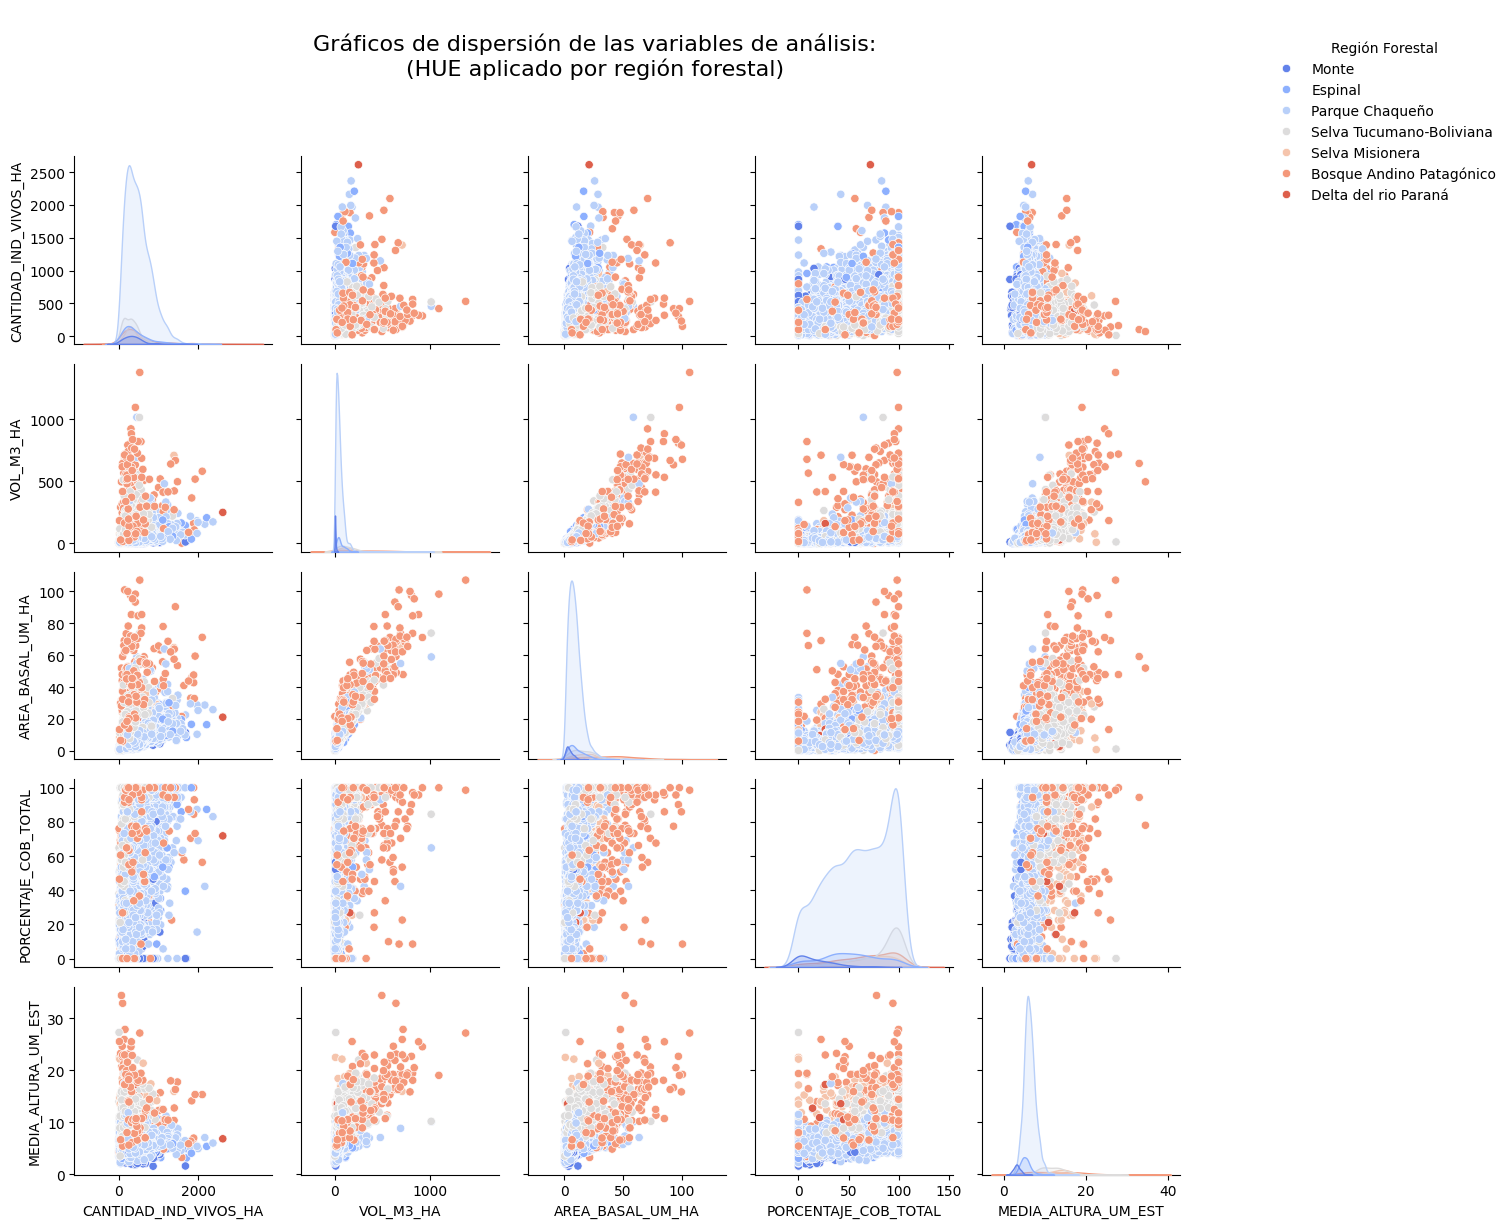

In [ ]:
g = sns.pairplot(
    data=df_general_c[variablesDeAnalisis + ['REGION_NOMBRE']],
    hue='REGION_NOMBRE',
    palette= 'coolwarm',
    kind='scatter',
    height=2.5,
    aspect=1,
    dropna=True
)
g.fig.set_size_inches(12, 12)
g.fig.suptitle("""
Gráficos de dispersión de las variables de análisis:
(HUE aplicado por región forestal)
""",
               fontsize=16,  y=1.02)  # y= para separar del gráfico
# Ajustar posición de la leyenda
g._legend.set_title('Región Forestal')
g._legend.set_bbox_to_anchor((1.05, 1))
g._legend.set_loc('upper left')
plt.tight_layout()
plt.show()

Como se observó anteriormente el volumen de madera por hectárea está altamente correlacionado con el área basal media. 

### ==========================================================================
### Segmento especial de ejemplo con formato accesible para usuarios con discapacidad visual:
### =============================================================================

In [25]:
import altair as alt
from IPython.display import Markdown, Audio
from gtts import gTTS

# ejemplo, uso las columnas 'REGION_NOMBRE', 'VOL_M3_HA', 'AREA_BASAL_UM_HA', 'CANTIDAD_IND_VIVOS_HA'
df = df_general_c[['REGION_NOMBRE', 'VOL_M3_HA', 'AREA_BASAL_UM_HA', 'CANTIDAD_IND_VIVOS_HA']].dropna()

# Creamos gráfico accesible con Altair
chart = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('AREA_BASAL_UM_HA', title='Área Basal (m²/ha)'),
    y=alt.Y('VOL_M3_HA', title='Volumen Comercial (m³/ha)'),
    color=alt.Color('REGION_NOMBRE', title='Región Forestal'),
    tooltip=['REGION_NOMBRE', 'VOL_M3_HA', 'AREA_BASAL_UM_HA', 'CANTIDAD_IND_VIVOS_HA']
).properties(
    title='Relación entre Área Basal y Volumen Comercial por Región Forestal',
    description='Cada punto representa una unidad de muestreo forestal. El eje X muestra el área basal, y el eje Y el volumen comercial. Los colores indican distintas regiones forestales.'
).interactive()

chart.display()

# Resumen narrativo textual
media_vol = df['VOL_M3_HA'].mean()
media_area = df['AREA_BASAL_UM_HA'].mean()
media_individuos = df['CANTIDAD_IND_VIVOS_HA'].mean()

resumen = f"""
### Resumen accesible de datos forestales:

- El **volumen comercial promedio** por hectárea es de **{media_vol:.2f} m³/ha**.
- El **área basal promedio** por hectárea es de **{media_area:.2f} m²/ha**.
- La **cantidad promedio de individuos vivos** es de **{media_individuos:.0f} por hectárea**.
"""

display(Markdown(resumen))

# Generamos audio con gTTS (aqui también se puede describir el gráfico de ser necesario):
texto_audio = f"""El volumen comercial general promedio por hectárea es de {media_vol:.2f} metros cúbicos.
El área basal general promedio es de {media_area:.2f} metros cuadrados por hectárea.
La cantidad de individuos vivos general promedio es de {media_individuos:.0f} por hectárea.
El gráfico muestra la relación entre el área basal y el volumen comercial separadas por regiónforestal.
Se puede obvservar una correlación lineal positiva entre estas dos variables, lo que indica que a mayor área basal, mayor volumen comercial de madera por hectárea.
También se destaca que la región forestal con mayor área basal media corresponde al Bosque Andino Patagónico, con un área basal promedio de 
{df[df['REGION_NOMBRE'] == 'Bosque Andino Patagónico']['AREA_BASAL_UM_HA'].mean():.2f} metros cuadrados por hectárea."""

tts = gTTS(text=texto_audio, lang='es')
tts.save("audio_resumen.mp3")
Audio("audio_resumen.mp3")

alt.Chart(...)


### Resumen accesible de datos forestales:

- El **volumen comercial promedio** por hectárea es de **73.13 m³/ha**.
- El **área basal promedio** por hectárea es de **11.99 m²/ha**.
- La **cantidad promedio de individuos vivos** es de **463 por hectárea**.
